# Binary Prediction of Smoker Status using Bio-Signals

Goal: Predict "smoking" class 0 or 1, based on features available such as Age, height, weight, waist, cholesterol levels and other biological signals.  

Evaluation: Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

## 📚 Imports

In [2]:
import numpy as np
import pandas as pd
import pathlib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
src_path = pathlib.Path("/kaggle/input/playground-series-s3e24")  
train_df = pd.read_csv(src_path / "train.csv")
target = "smoking"

## Features available

In [4]:
train_df.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

### Target variable

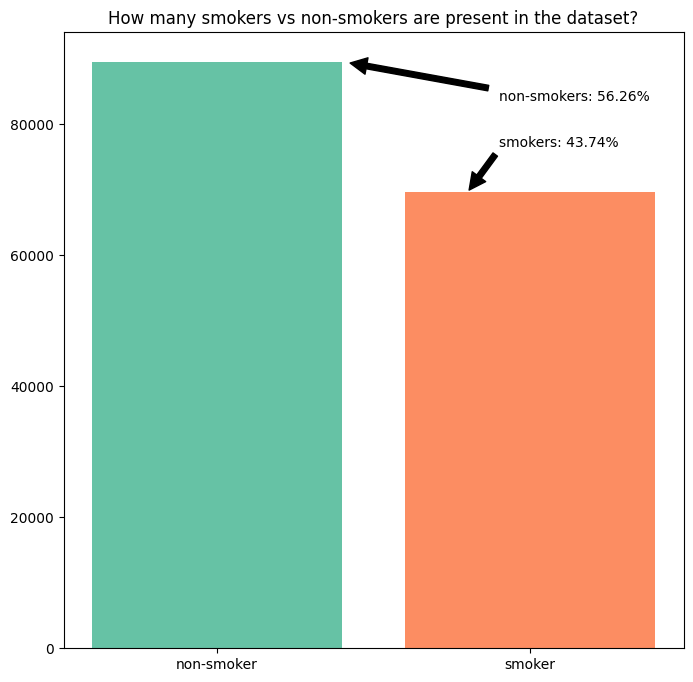

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.set_title("How many smokers vs non-smokers are present in the dataset?")

total_observations = len(train_df)
smokers = len(train_df[train_df[target] == 1])
non_smokers = len(train_df[train_df[target] == 0])

smokers_pct = smokers / total_observations * 100
non_smokers_pct = non_smokers / total_observations * 100



ax.bar(x=["non-smoker", "smoker"], height=[non_smokers, smokers], color=sns.color_palette("Set2"))


ax.annotate(f'non-smokers: {non_smokers_pct:.2f}%', xy=(0.4, non_smokers*1), xytext=(0.9, smokers*1.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate(f'smokers: {smokers_pct:.2f}%', xy=(0.8, smokers*1), xytext=(0.9, smokers*1.1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )






plt.show()

### Basic attributes

/tmp/ipykernel_32/1630205125.py:13: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/1630205125.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


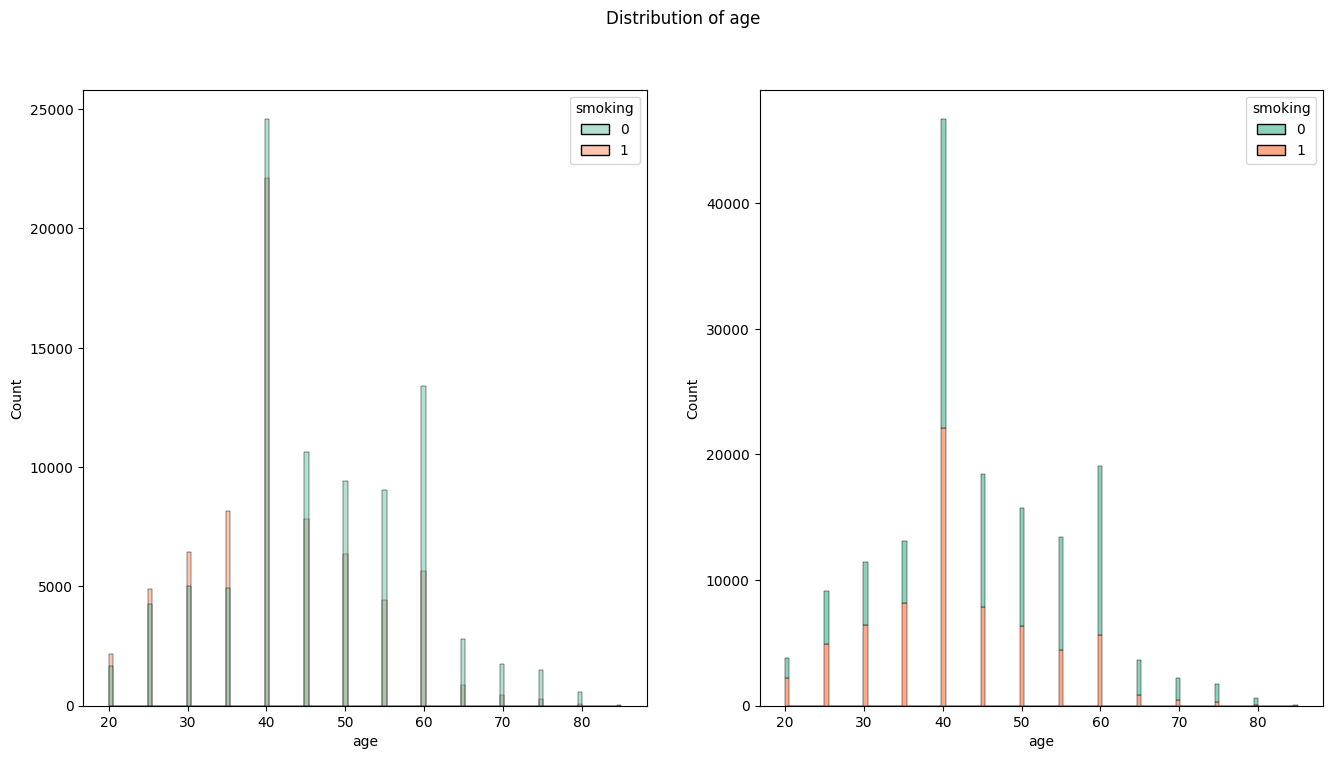

/tmp/ipykernel_32/1630205125.py:13: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/1630205125.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


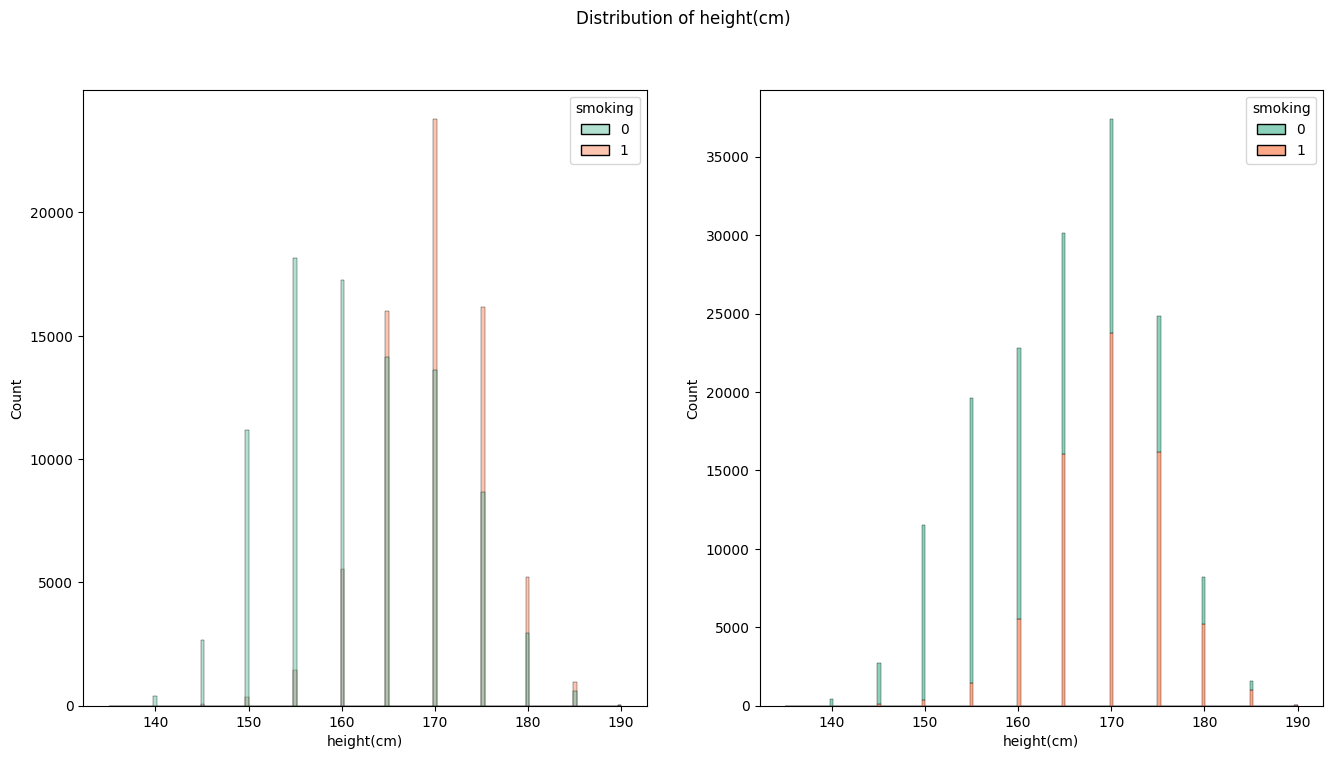

/tmp/ipykernel_32/1630205125.py:13: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/1630205125.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


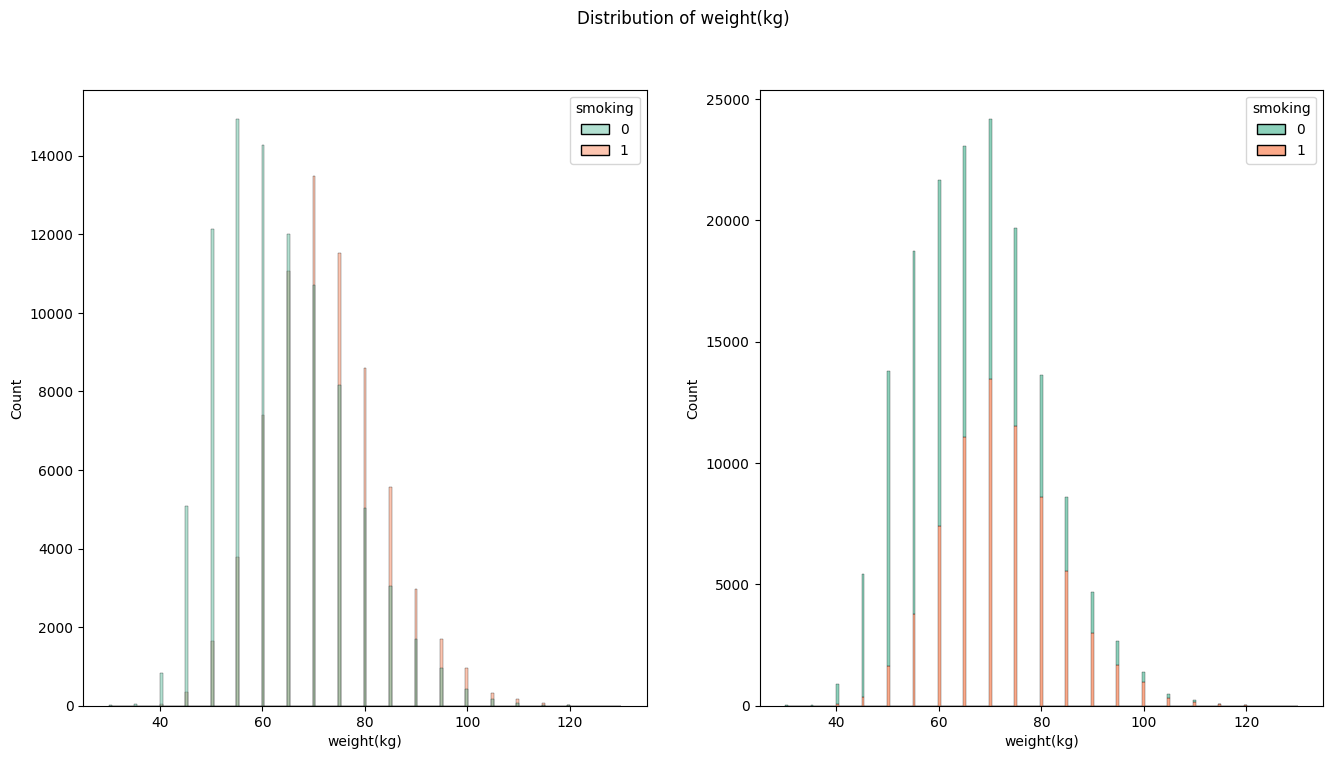

/tmp/ipykernel_32/1630205125.py:13: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/1630205125.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


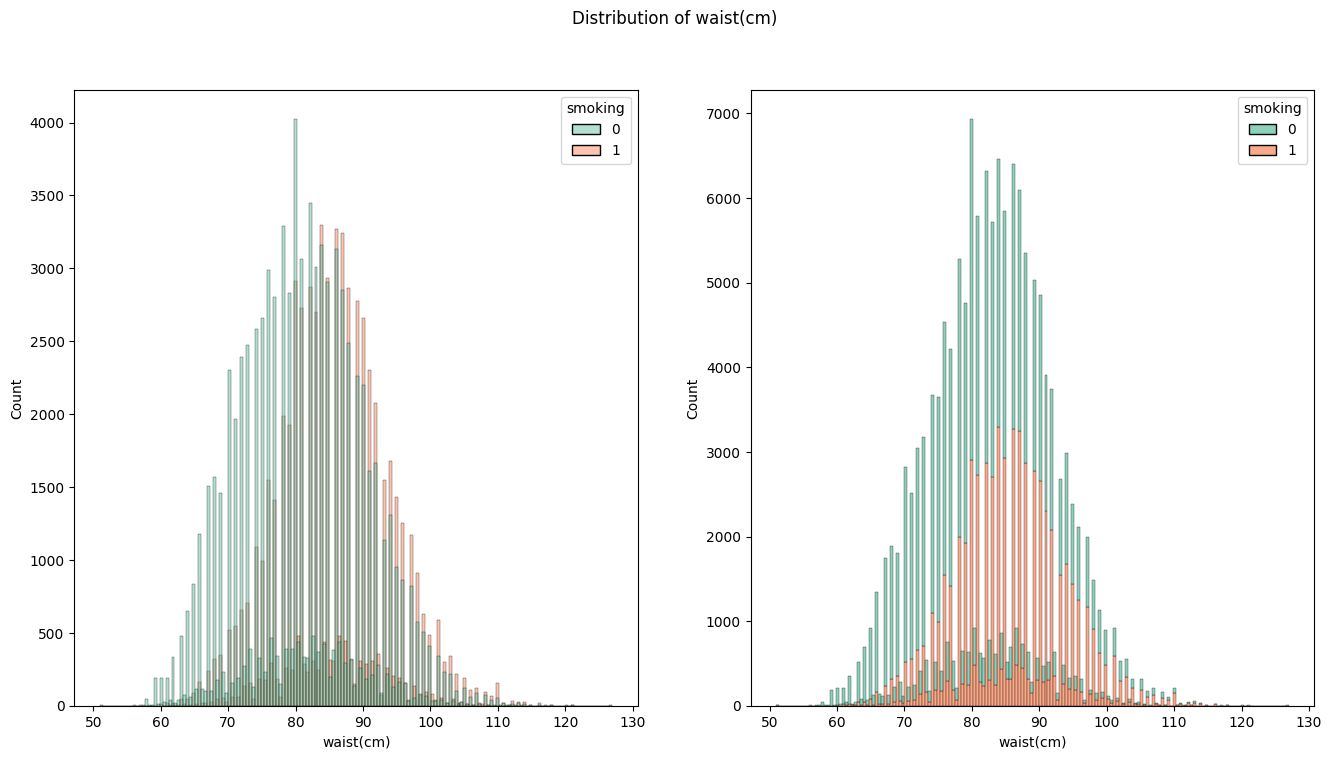

/tmp/ipykernel_32/1630205125.py:13: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/1630205125.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


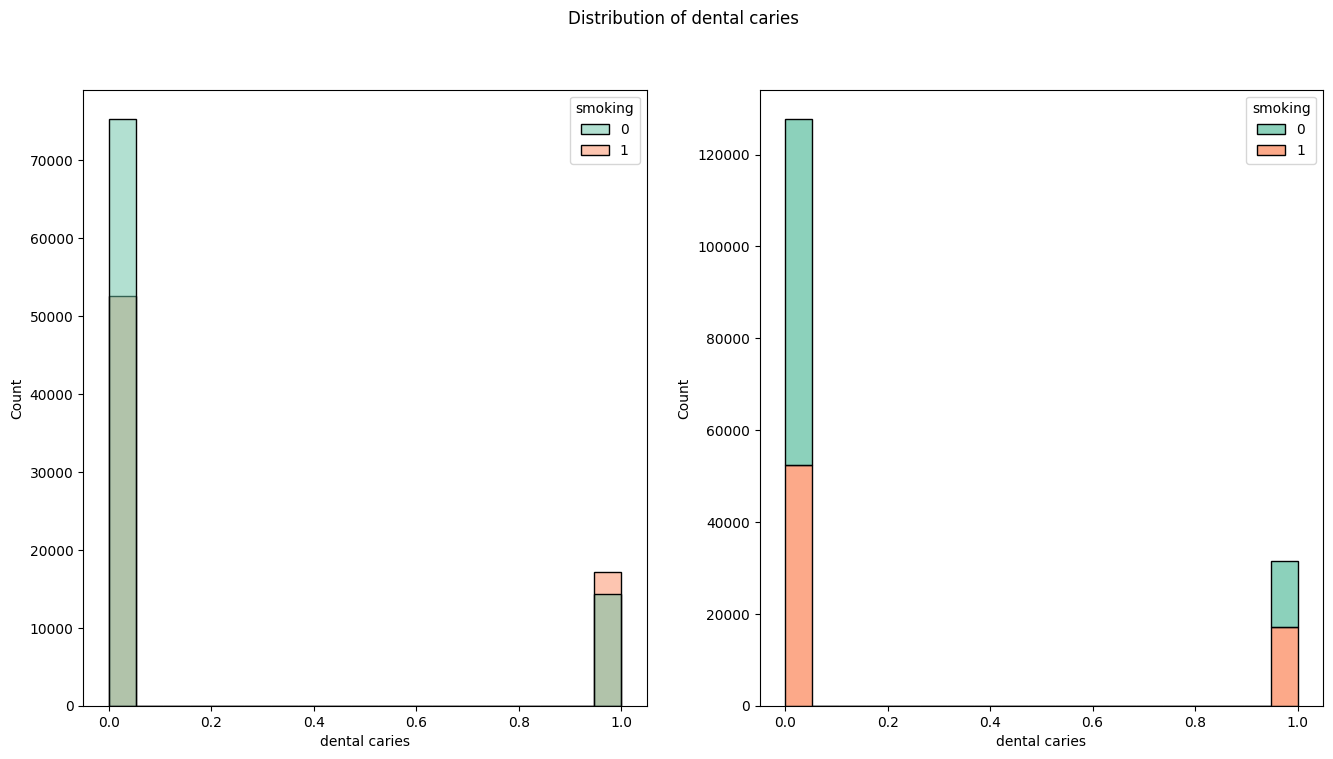

In [6]:
physical_attributes = [
    "age",
    "height(cm)",
    "weight(kg)",
    "waist(cm)",
    "dental caries"
]

for c in physical_attributes:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    plt.suptitle(f"Distribution of {c}")
    sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
    sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")
    
    plt.show()

### Perception

count    159256.000000
mean          1.005798
std           0.402113
min           0.100000
25%           0.800000
50%           1.000000
75%           1.200000
max           9.900000
Name: eyesight(left), dtype: float64


/tmp/ipykernel_32/1400038566.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/1400038566.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


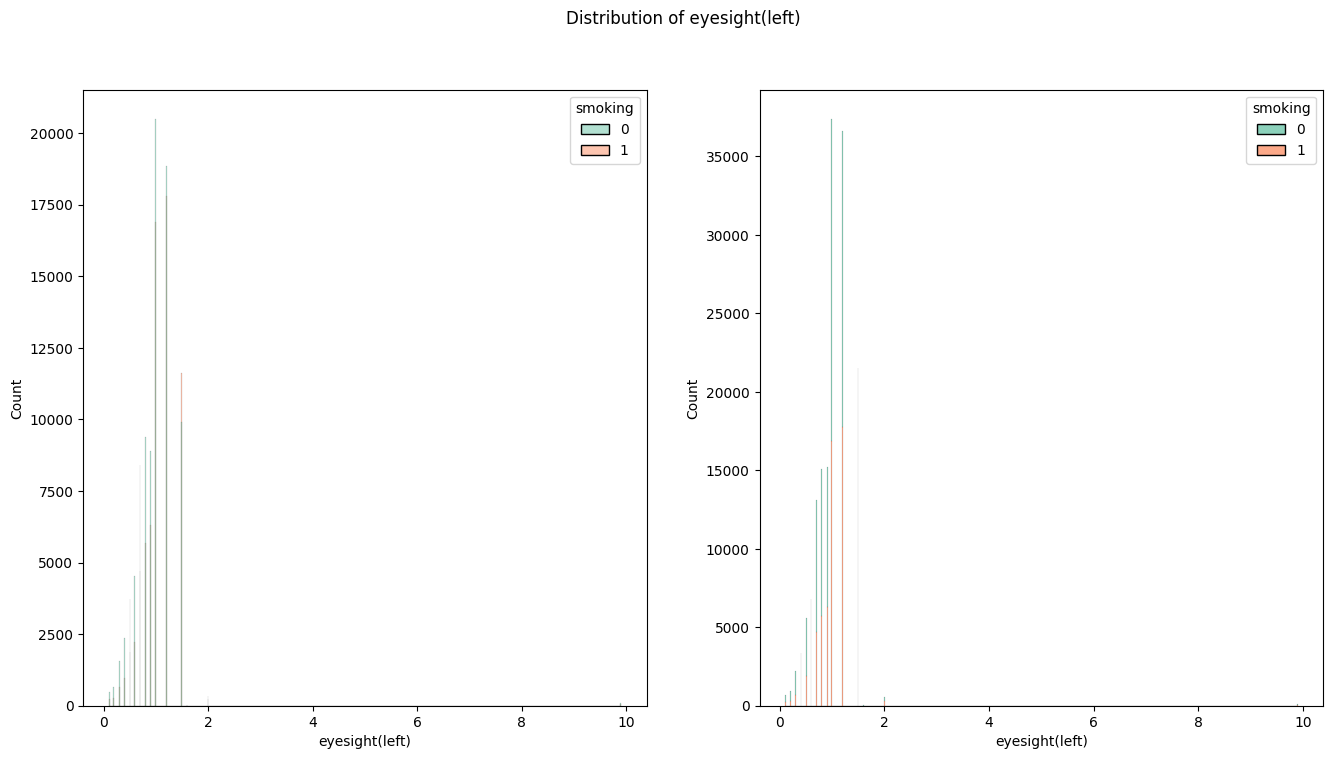

count    159256.000000
mean          1.000989
std           0.392299
min           0.100000
25%           0.800000
50%           1.000000
75%           1.200000
max           9.900000
Name: eyesight(right), dtype: float64


/tmp/ipykernel_32/1400038566.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/1400038566.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


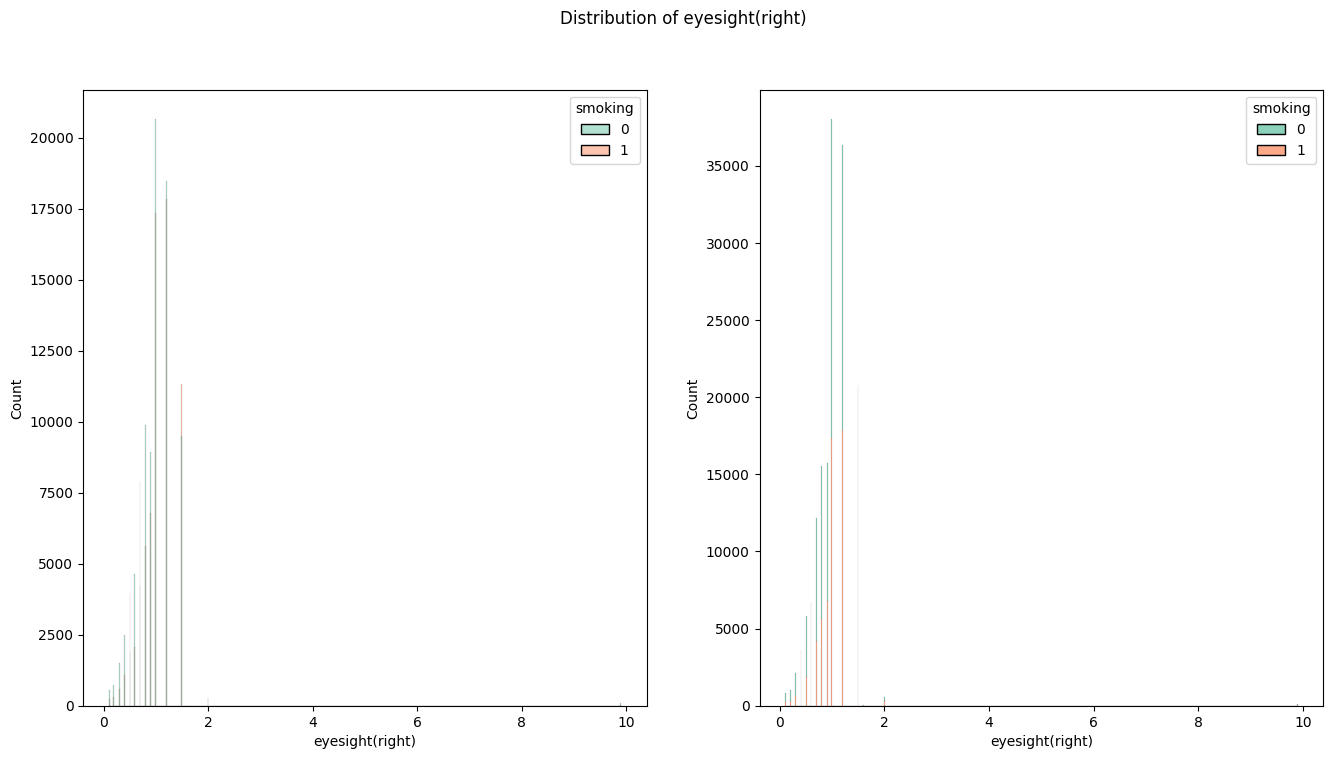

count    159256.000000
mean          1.023974
std           0.152969
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: hearing(left), dtype: float64


/tmp/ipykernel_32/1400038566.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/1400038566.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


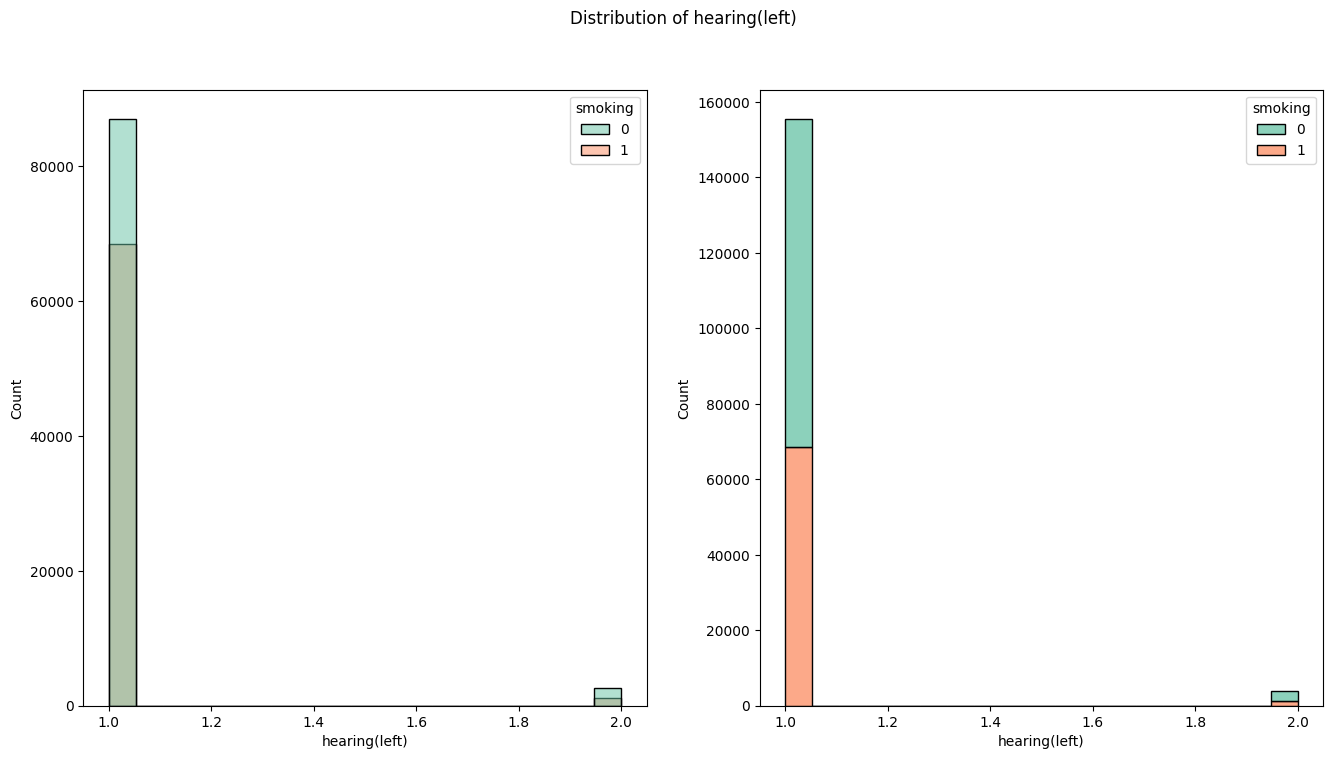

count    159256.000000
mean          1.023421
std           0.151238
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: hearing(right), dtype: float64


/tmp/ipykernel_32/1400038566.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/1400038566.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


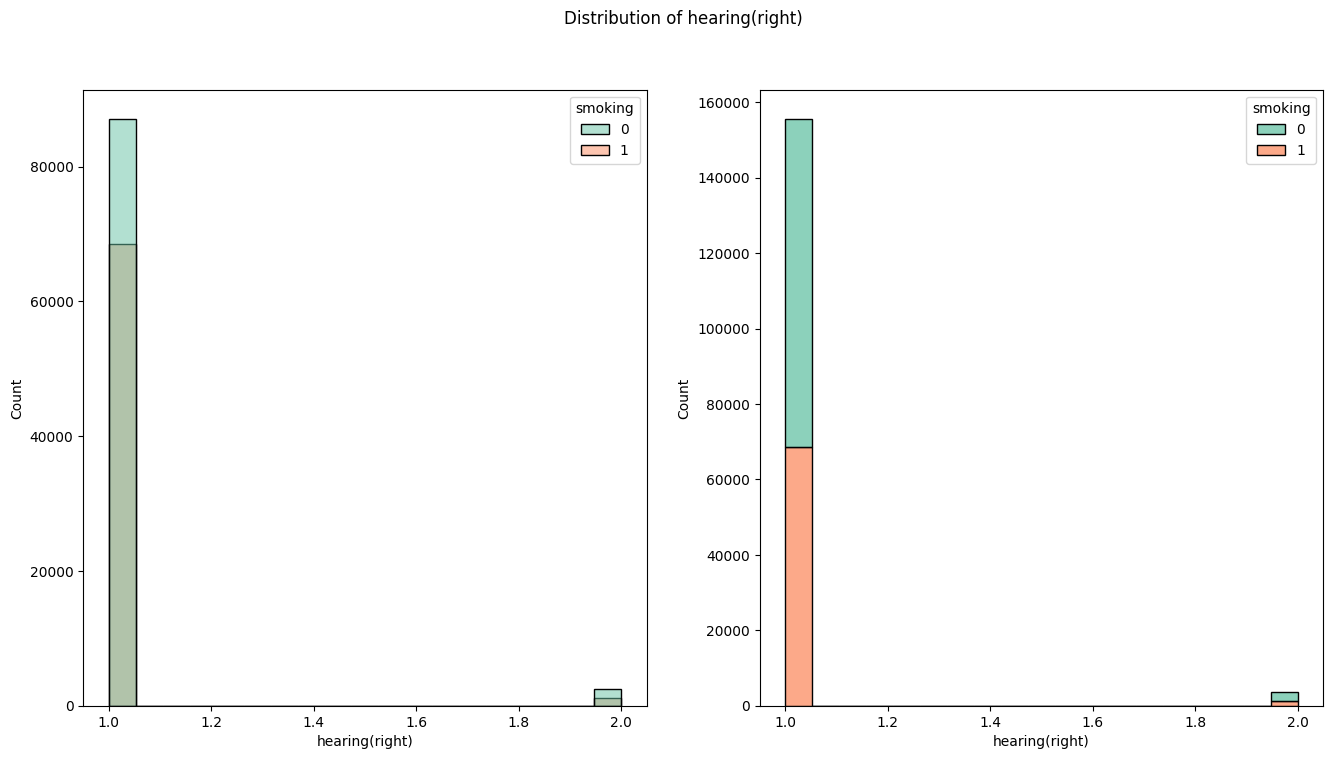

In [17]:
perception_attributes = [
    "eyesight(left)",
    "eyesight(right)", 
    "hearing(left)", 
    "hearing(right)"
]

for c in perception_attributes:
    
    print(train_df[c].describe())
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    plt.suptitle(f"Distribution of {c}")
    sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
    sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")
    
    plt.show()

### Heart

/tmp/ipykernel_32/374609533.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/374609533.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


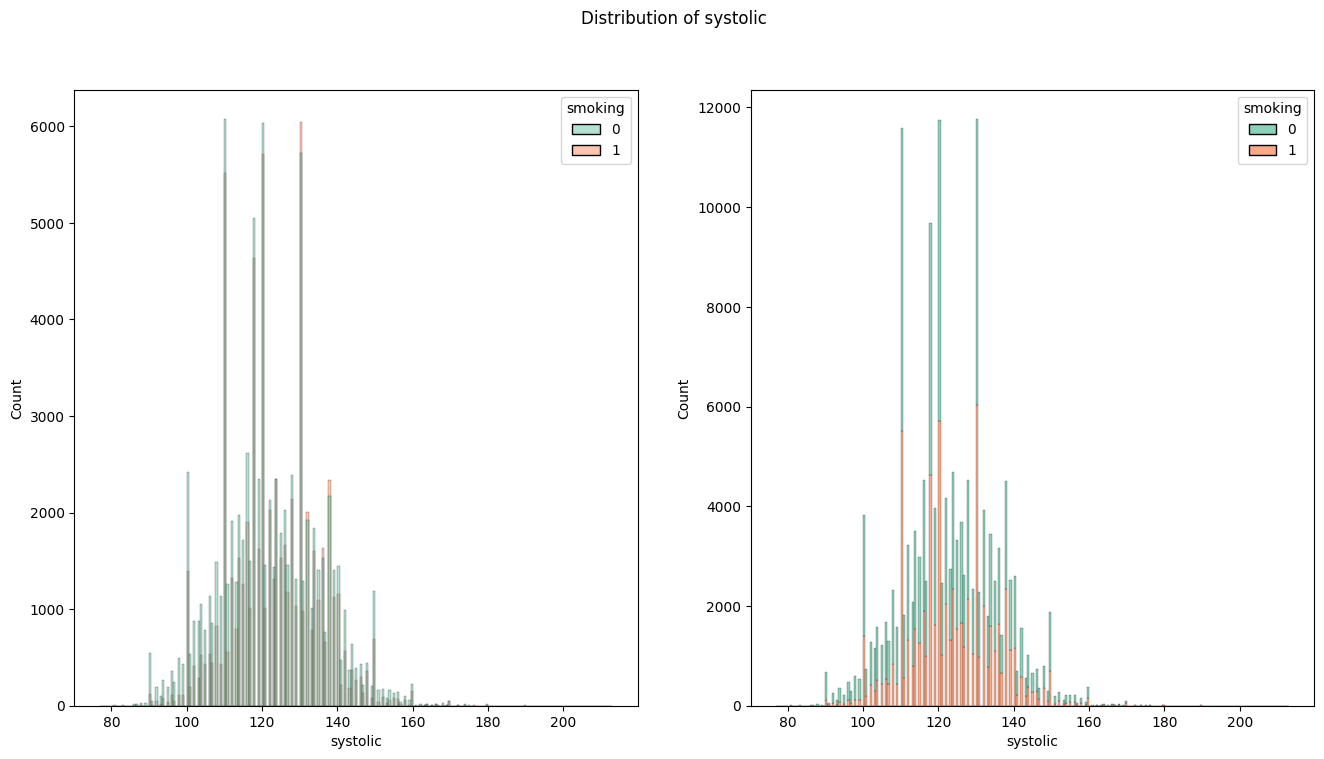

/tmp/ipykernel_32/374609533.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/374609533.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


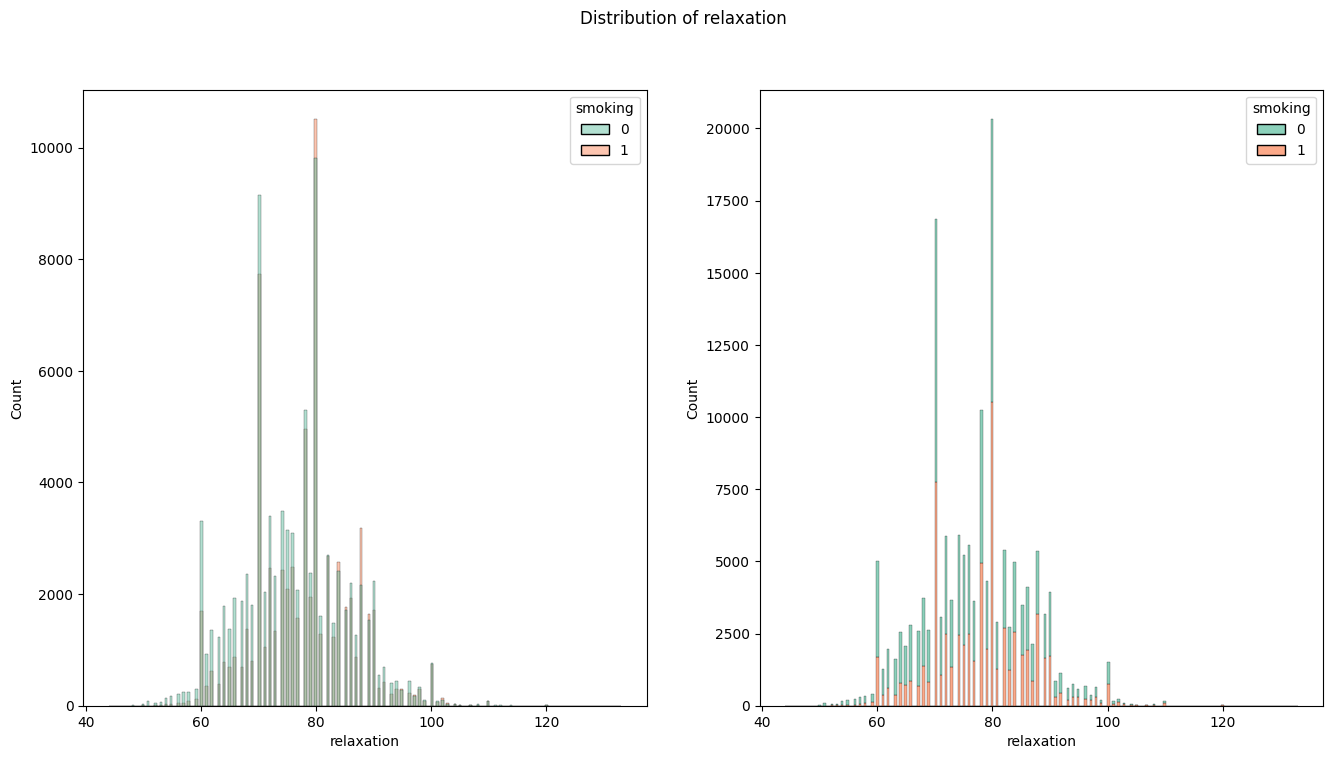

In [12]:
heart_features = [
    "systolic",
    "relaxation"
]

for c in heart_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    plt.suptitle(f"Distribution of {c}")
    sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
    sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")
    
    plt.show()

### Cholesterol

/tmp/ipykernel_32/4000809026.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/4000809026.py:12: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


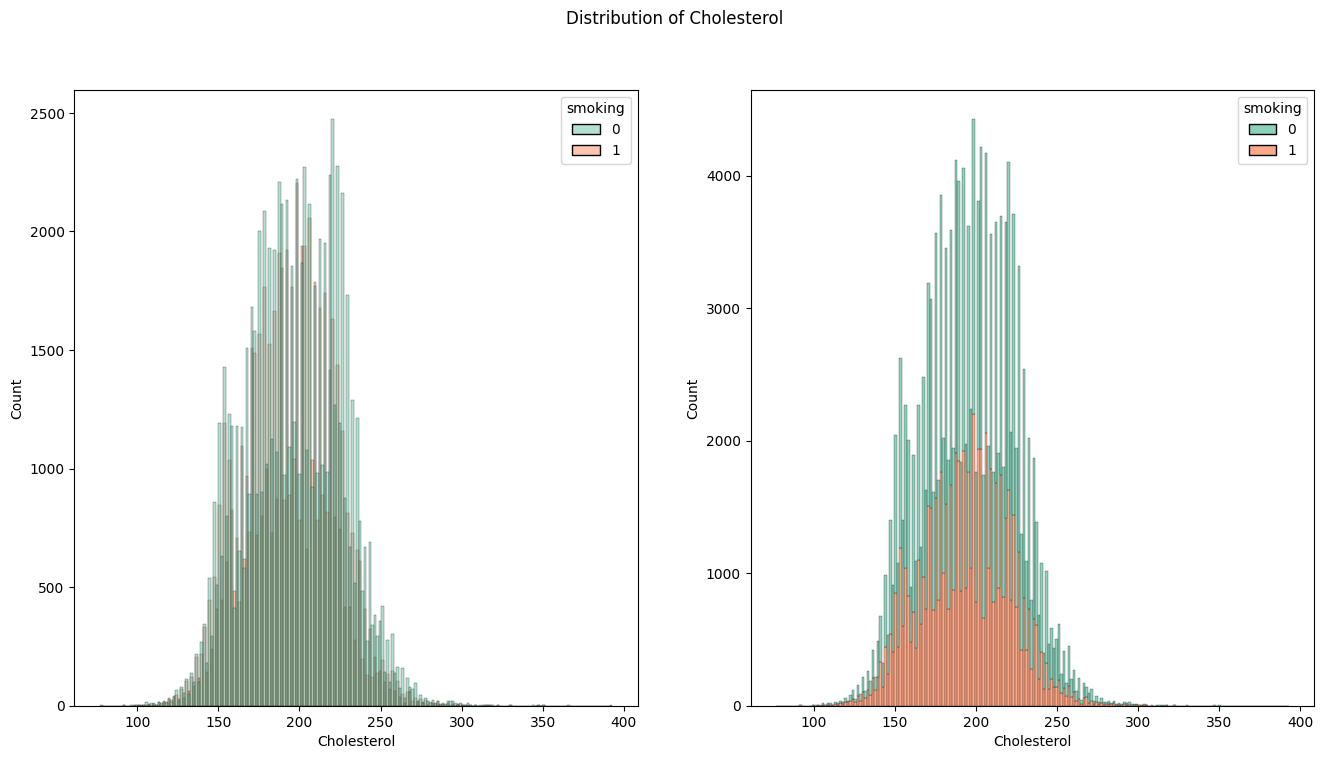

/tmp/ipykernel_32/4000809026.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/4000809026.py:12: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


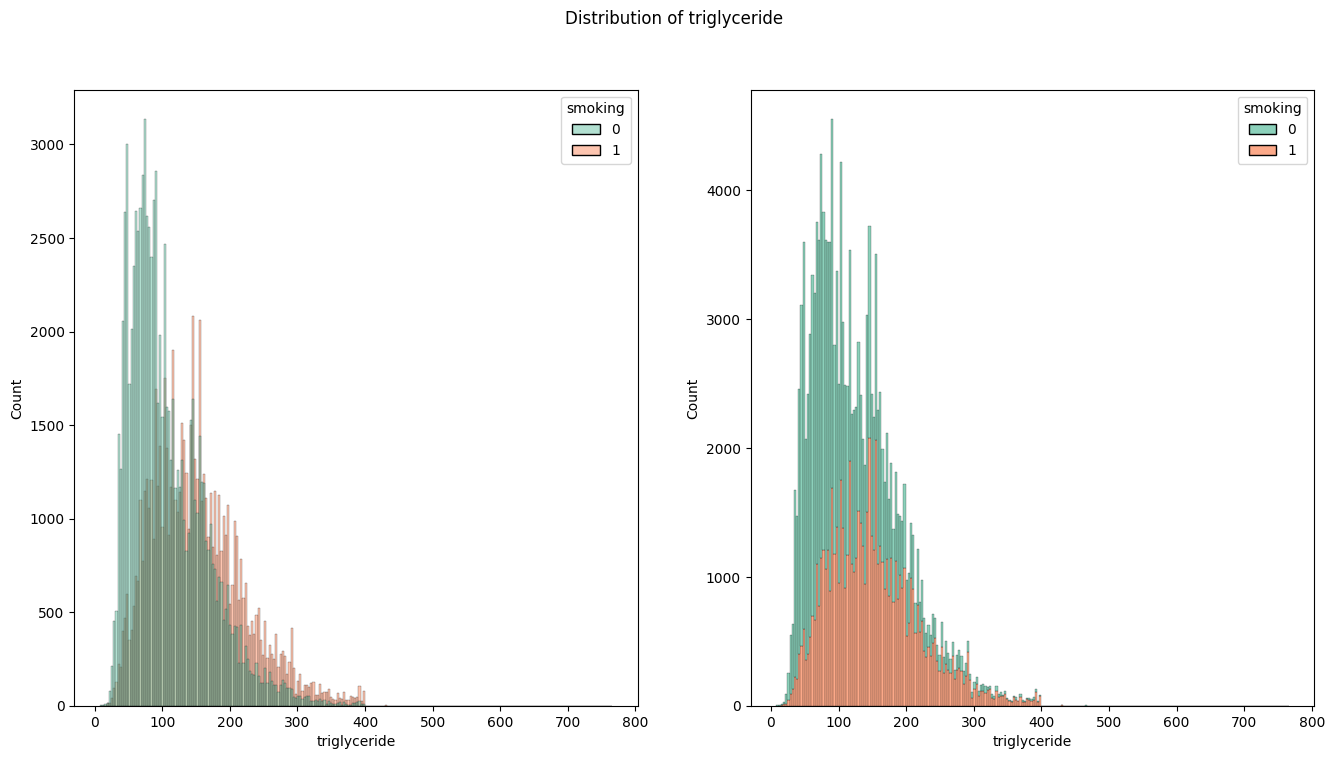

/tmp/ipykernel_32/4000809026.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/4000809026.py:12: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


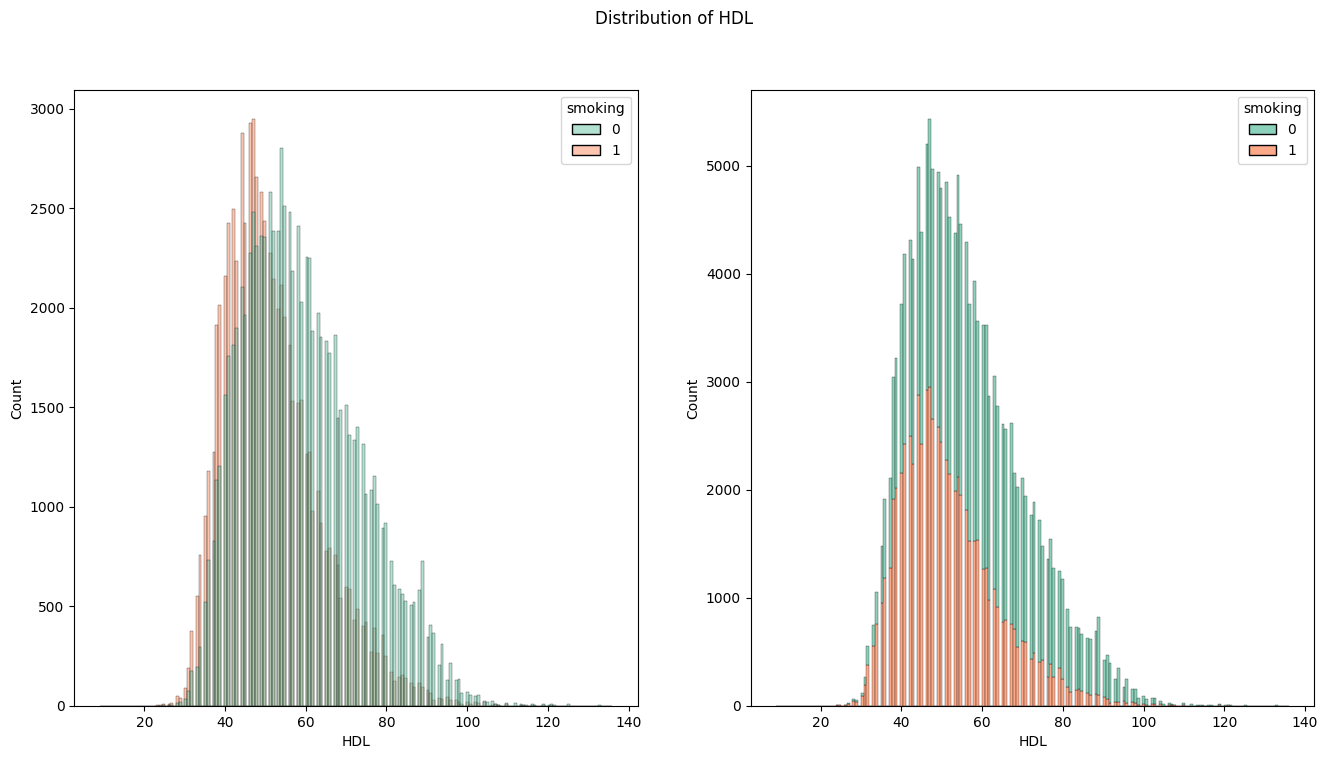

/tmp/ipykernel_32/4000809026.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/4000809026.py:12: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


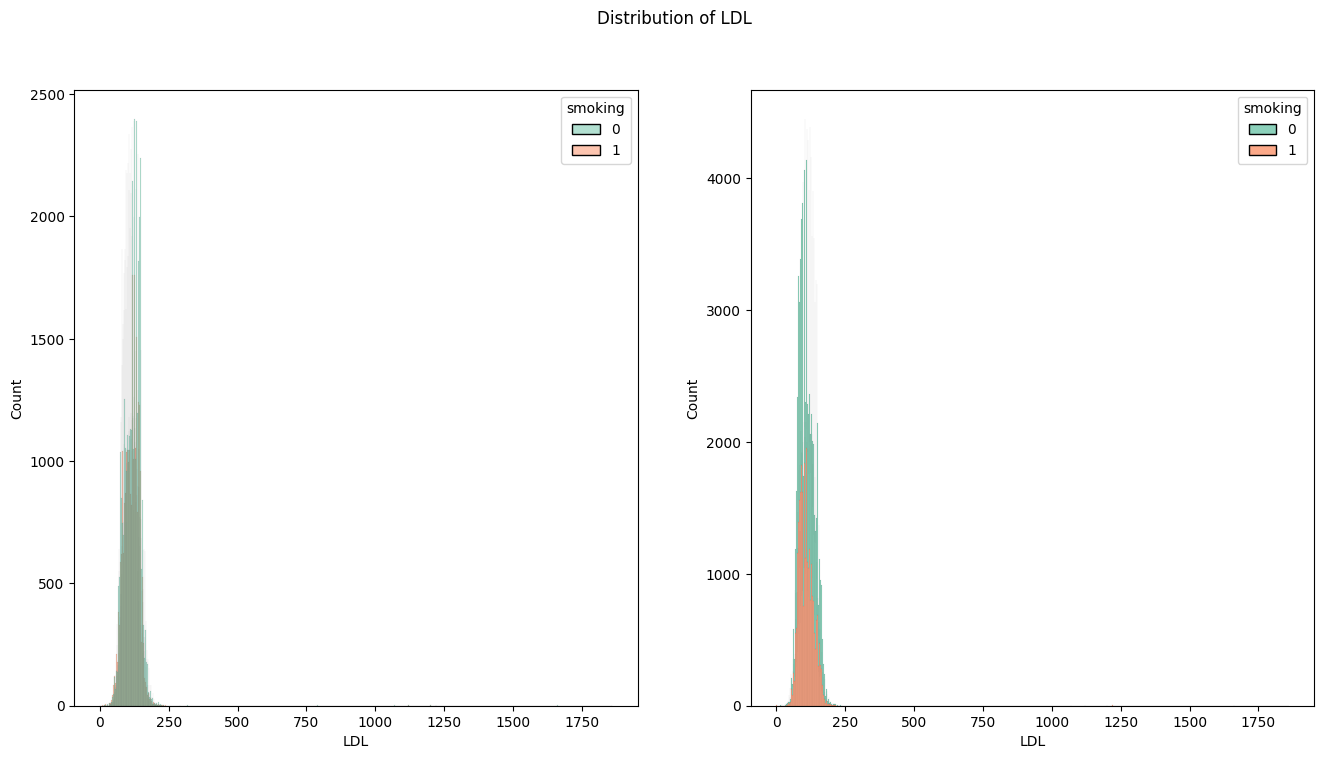

In [13]:
cholesterol_features = [
    "Cholesterol", 
    "triglyceride",
    "HDL", "LDL"
]

for c in cholesterol_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    plt.suptitle(f"Distribution of {c}")
    sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
    sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")
    
    plt.show()

### Other blood features

/tmp/ipykernel_32/2191756450.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/2191756450.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


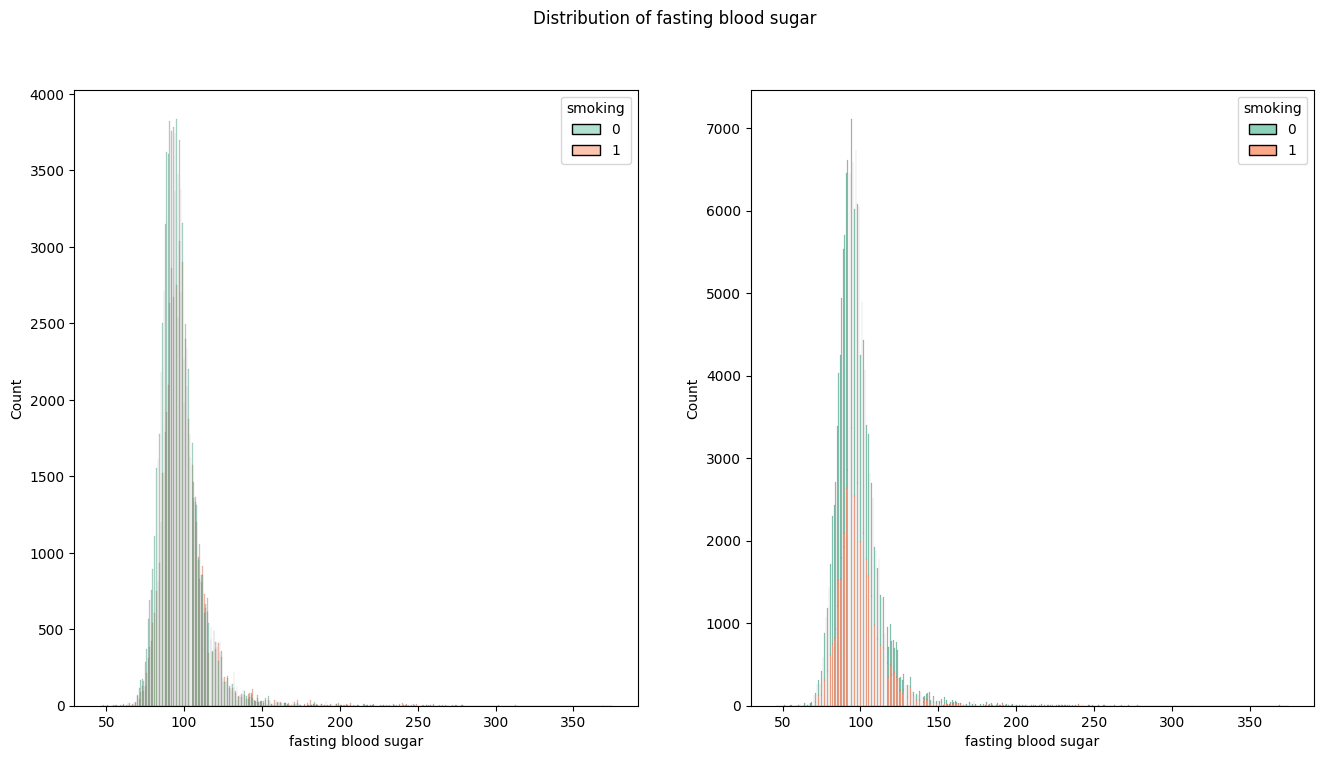

/tmp/ipykernel_32/2191756450.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/2191756450.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


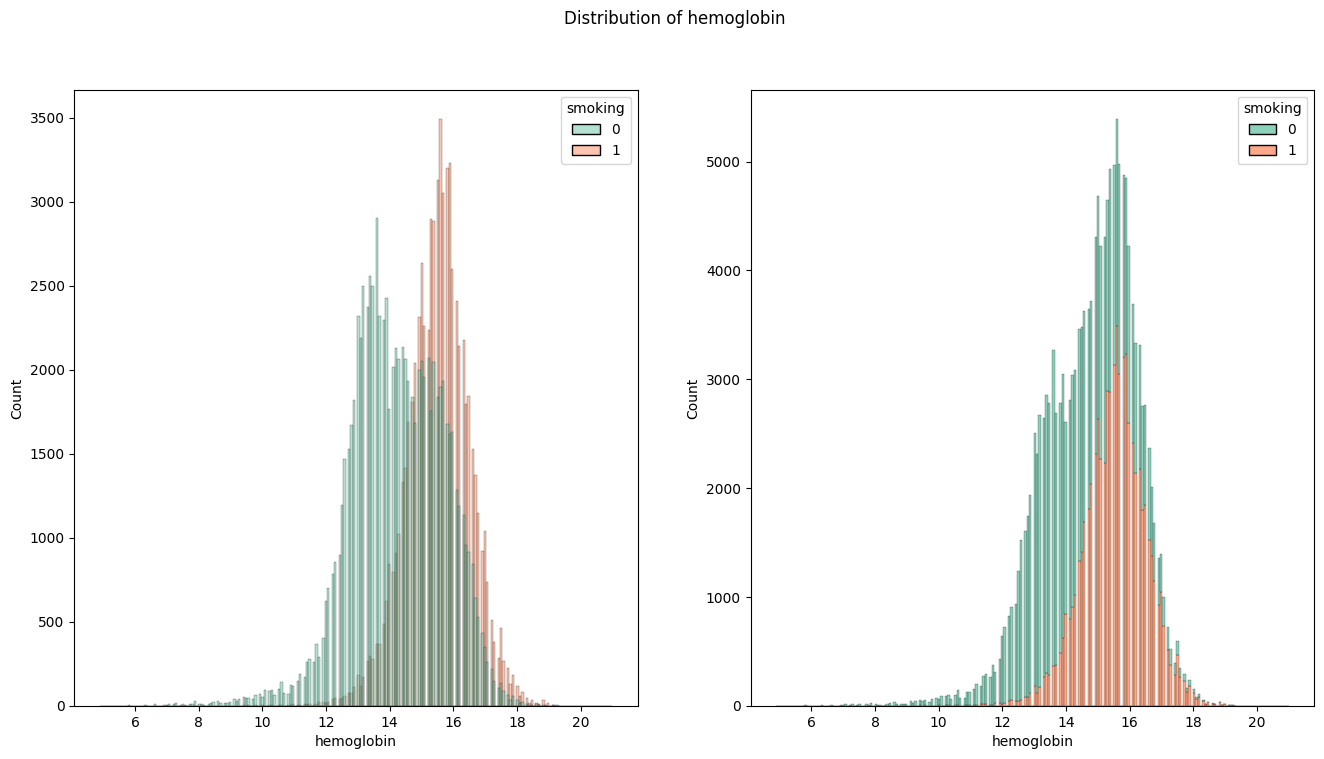

/tmp/ipykernel_32/2191756450.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/2191756450.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


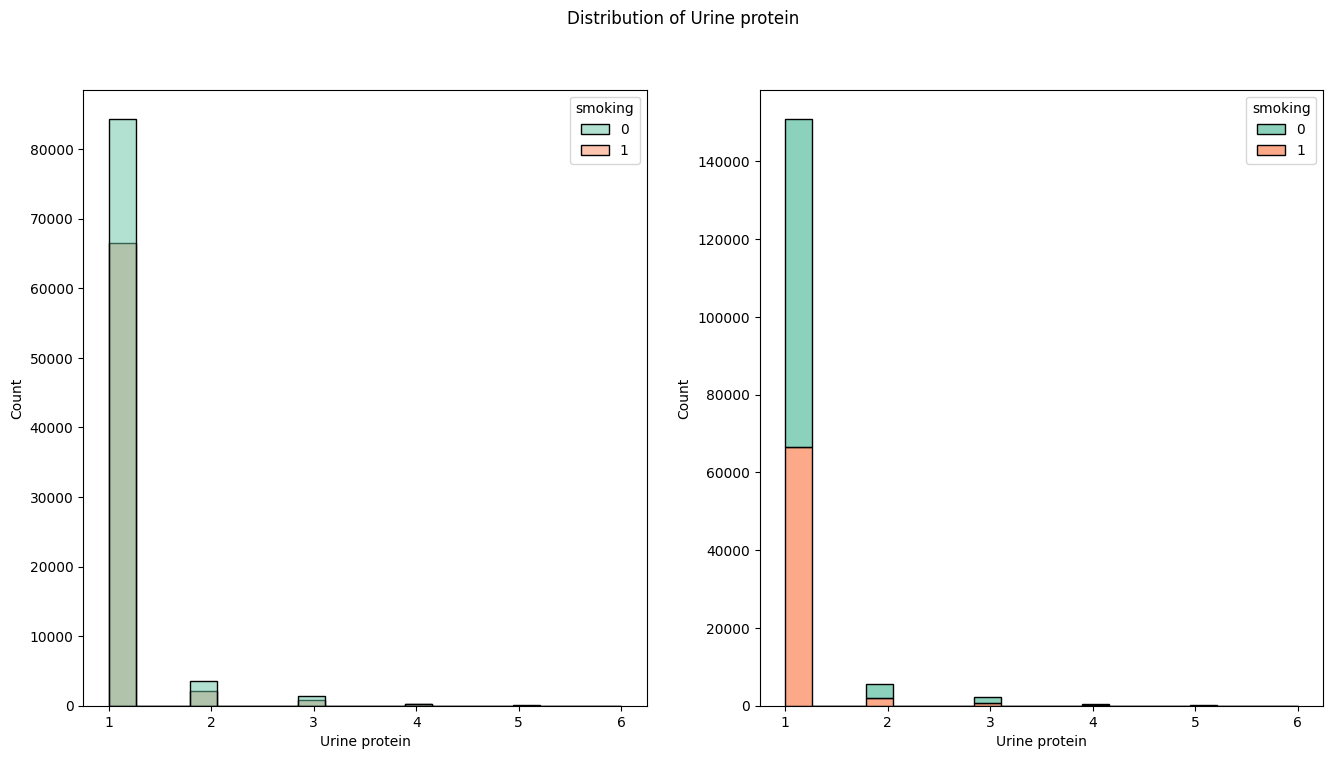

/tmp/ipykernel_32/2191756450.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/2191756450.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


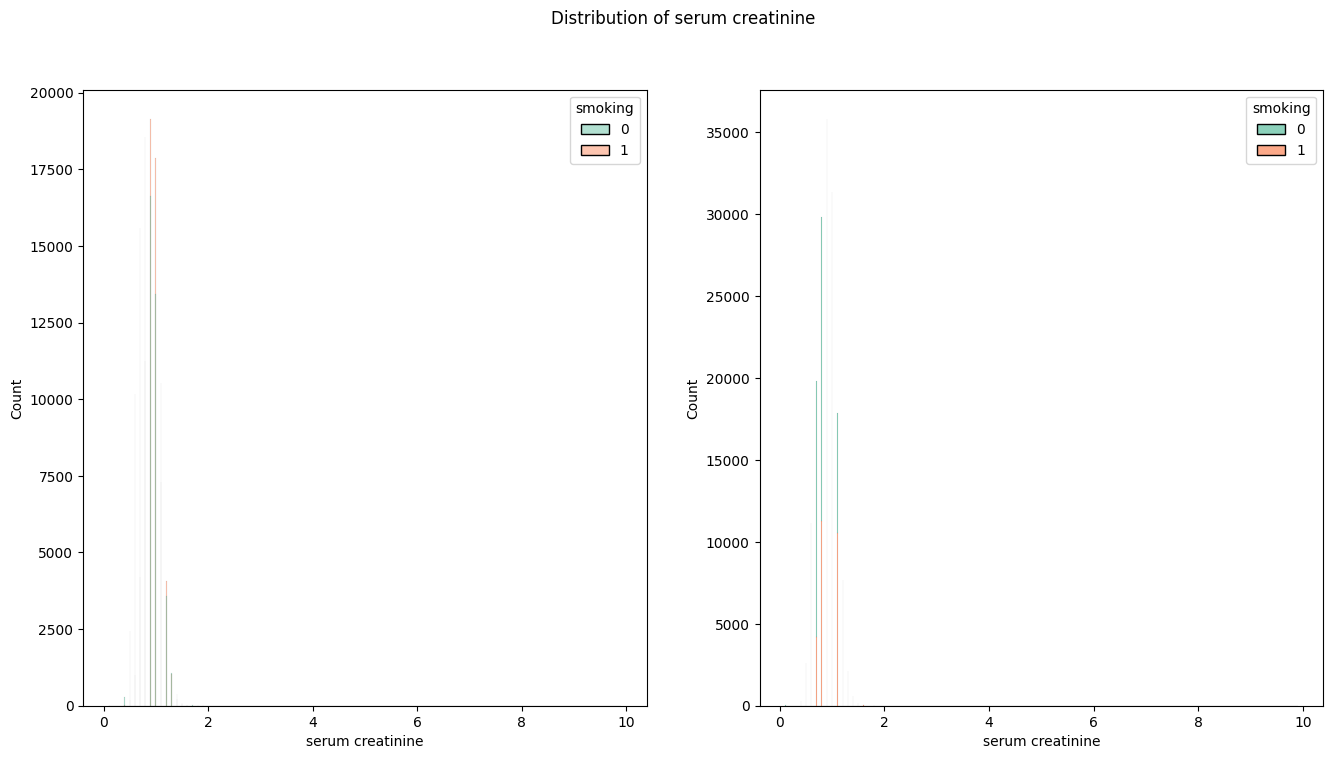

/tmp/ipykernel_32/2191756450.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/2191756450.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


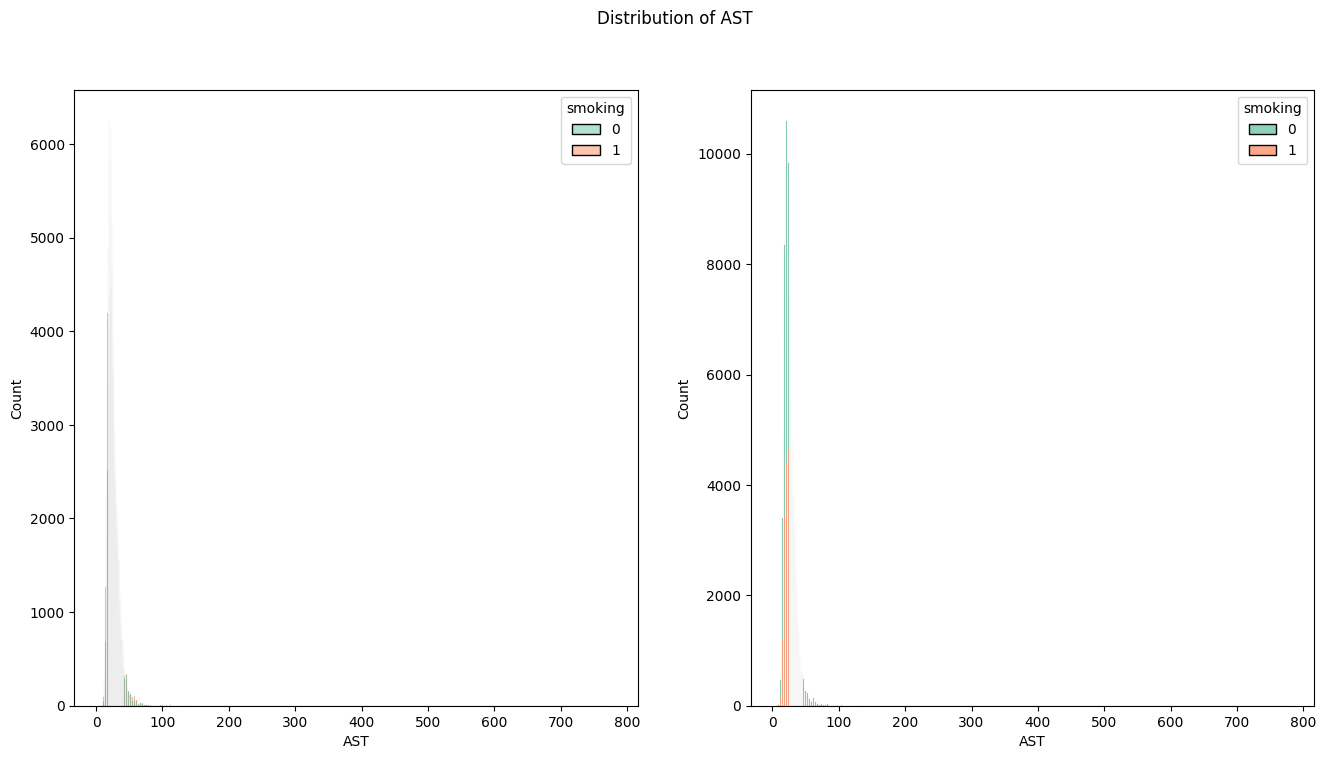

/tmp/ipykernel_32/2191756450.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/2191756450.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


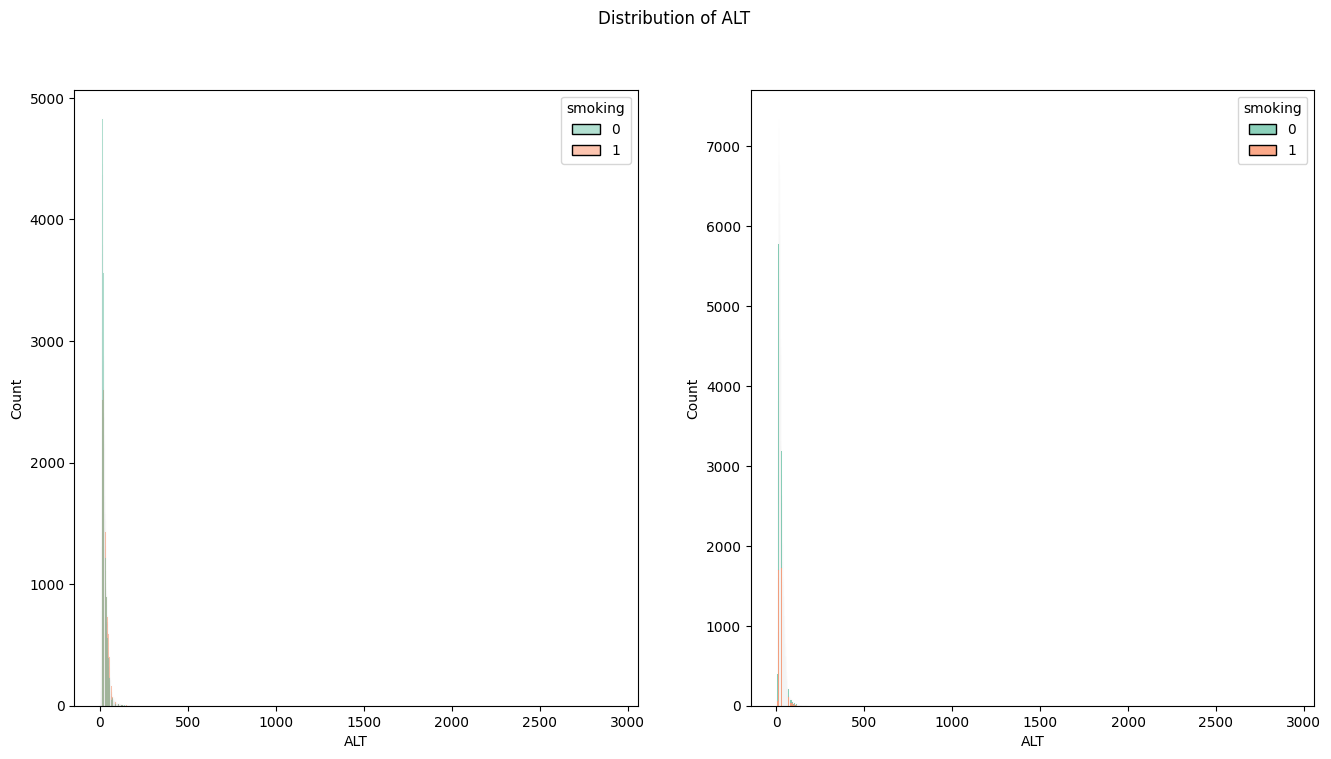

/tmp/ipykernel_32/2191756450.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
/tmp/ipykernel_32/2191756450.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")


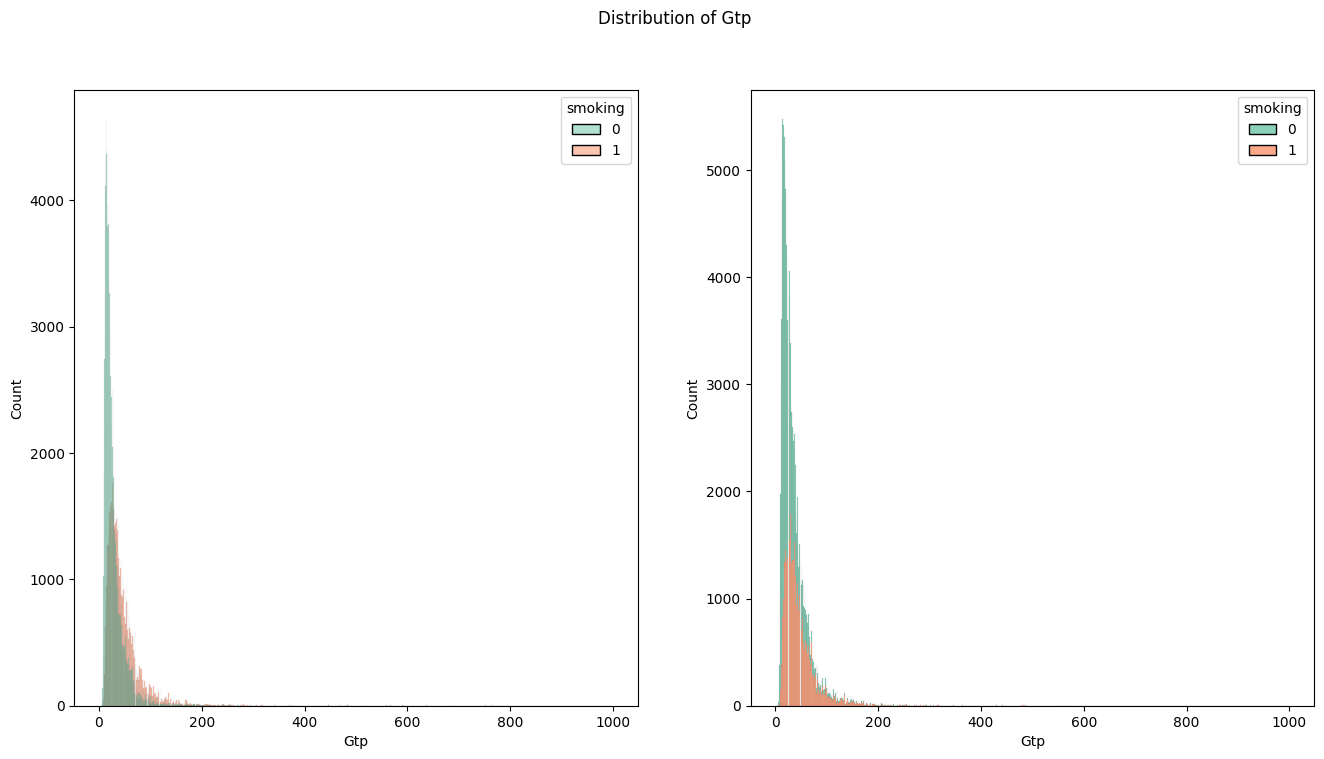

In [14]:
other = [
    'fasting blood sugar', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp'
]

for c in other:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    plt.suptitle(f"Distribution of {c}")
    sns.histplot(train_df, x=c, hue=target, ax=axes[0], palette=sns.color_palette("Set2"))
    sns.histplot(train_df, x=c, hue=target, ax=axes[1], palette=sns.color_palette("Set2"), multiple="stack")
    
    plt.show()

# Initial model & submission